Saving heart.csv to heart.csv
Dataset shape: (1025, 14)
Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Statistics:
                age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach   

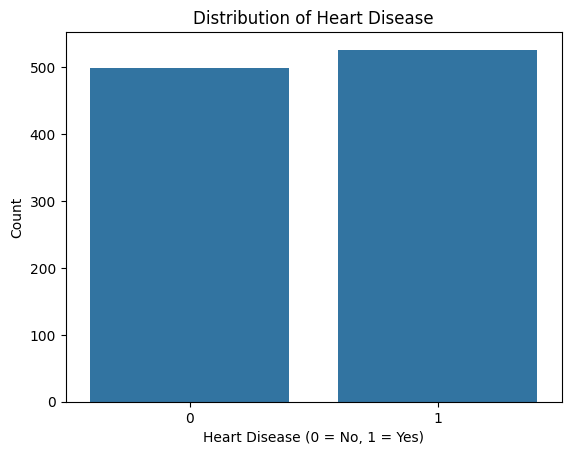

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7012 - loss: 0.5996 - val_accuracy: 0.7805 - val_loss: 0.5278
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8652 - loss: 0.4042 - val_accuracy: 0.8171 - val_loss: 0.4682
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8894 - loss: 0.3043 - val_accuracy: 0.8171 - val_loss: 0.4529
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9019 - loss: 0.2853 - val_accuracy: 0.8293 - val_loss: 0.4460
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9069 - loss: 0.2585 - val_accuracy: 0.8293 - val_loss: 0.4467
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8820 - loss: 0.2908 - val_accuracy: 0.8476 - val_loss: 0.4395
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9225 - loss: 0.2198 - val_accuracy: 0.8415 - val_loss: 0.4354
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9421 - loss: 0.1951 - val_accuracy: 0.8598 - v

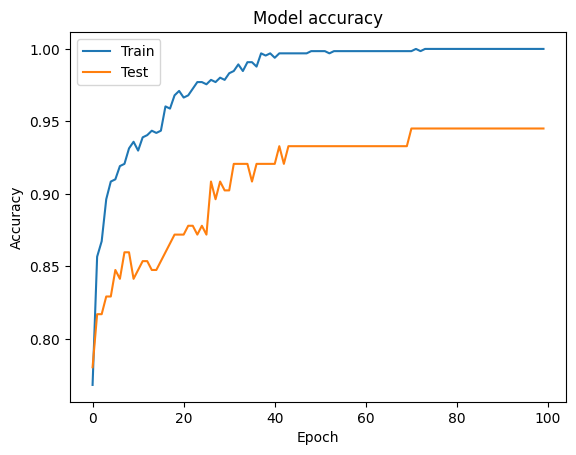

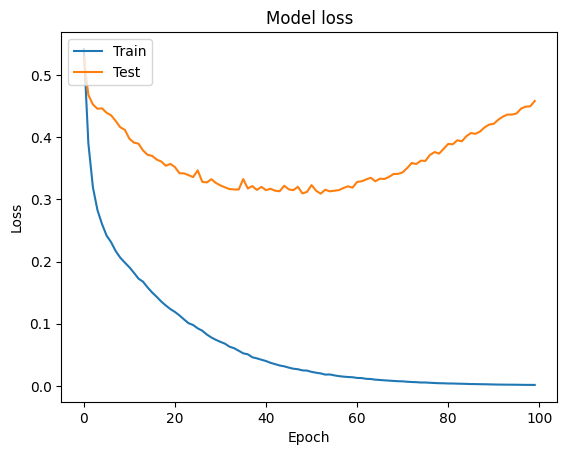

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Predictions:
 [1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0
 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0
 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0]


In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from google.colab import files

# Upload the dataset
uploaded = files.upload()

# Load the dataset into a DataFrame
data = pd.read_csv(next(iter(uploaded)))

# Explore the dataset
print("Dataset shape:", data.shape)
print("Missing values:\n", data.isnull().sum())
print("Statistics:\n", data.describe())
sns.countplot(x='target', data=data)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Preprocess the data
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Make predictions
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary output
print("Predictions:\n", predictions.flatten())